In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import plotnine as p9

In [26]:
df = pd.read_csv('../orginal_data/exercise.csv')
df=df.head(40)
df.head()

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68


Jako że dane są zgodne z zasadami "tidy data" zapisujemy je do katalogu analysis_data

In [23]:
df.to_csv(path_or_buf='../analysis_data/exercise.csv')

In [4]:
model_x1 = smf.ols('y ~ x1', data=df.head(40)).fit()
params_x1=model_x1.params
model_x1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     6.890
Date:                Fri, 13 Dec 2019   Prob (F-statistic):             0.0124
Time:                        12:38:48   Log-Likelihood:                -119.47
No. Observations:                  40   AIC:                             242.9
Df Residuals:                      38   BIC:                             246.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0633      1.553      6.481      0.000       6.920      13.206
x1             0.6559      0.250      2.625      0.012       0.150       1.162
==============================================================================
Omnibus:                       13.821   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.043
Skew:                          -0.122   Prob(JB):                        0.218
Kurtosis:                       1.671   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model_x2 = smf.ols('y ~ x2', data=df.head(40)).fit()
params_x2=model_x2.params
model_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     275.2
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           5.38e-19
Time:                        12:38:55   Log-Likelihood:                -80.617
No. Observations:                  40   AIC:                             165.2
Df Residuals:                      38   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7853      0.660      5.732      0.000       2.448       5.122
x2             0.8322      0.050     16.589      0.000       0.731       0.934
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.221
Skew:                           0.600   Prob(JB):                        0.200
Kurtosis:                       3.701   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
fig_model_x1=(p9.ggplot(p9.aes(x='x1',y='y'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=params_x1['Intercept'],slope=params_x1['x1'])))

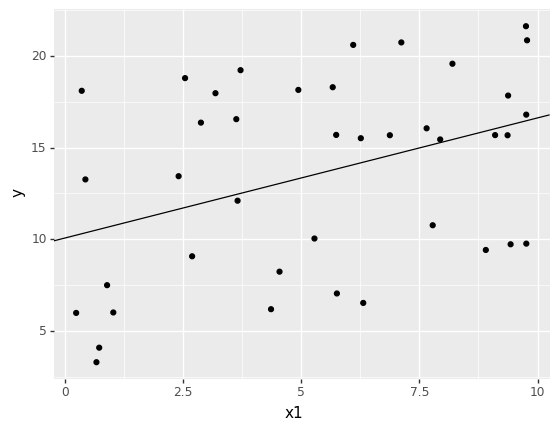

<ggplot: (-9223371957515239080)>

In [8]:
fig_model_x1

In [9]:
fig_model_x2=(p9.ggplot(p9.aes(x='x2',y='y'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=params_x2['Intercept'],slope=params_x2['x2'])))

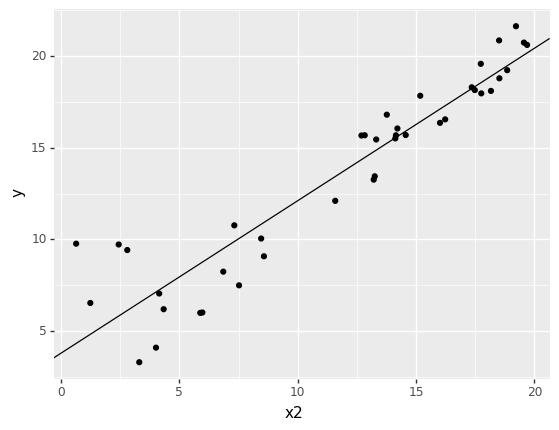

<ggplot: (-9223371957515168868)>

In [10]:
fig_model_x2

In [11]:
df['y_predicted_x1']=model_x1.predict()
df['y_predicted_x2']=model_x2.predict()

df['residualsx1']=df['y']-df['y_predicted_x1']
df['residualsx2']=df['y']-df['y_predicted_x2']

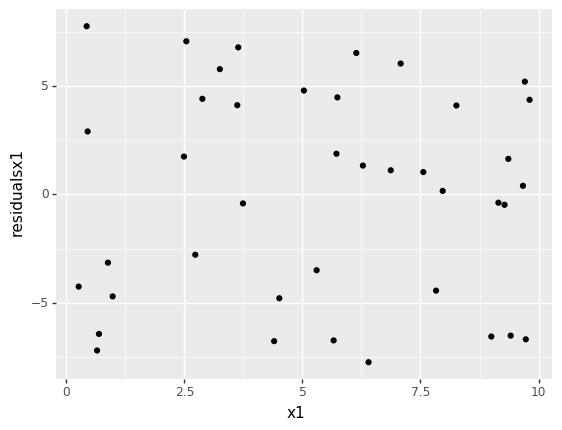

<ggplot: (-9223371957515168968)>

In [12]:
fig_res_x1=(p9.ggplot(p9.aes(x='x1',y='residualsx1'),data=df.head(40))
      +p9.geom_point())
fig_res_x1

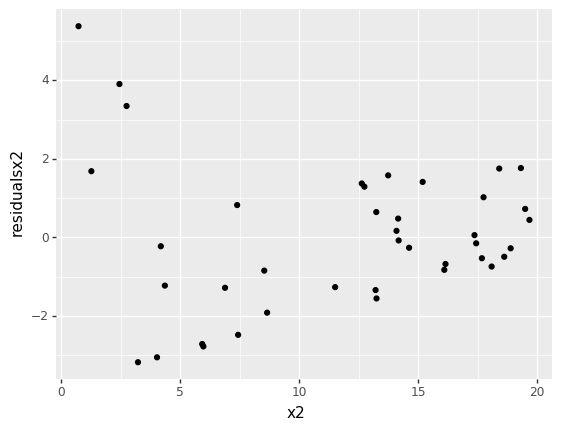

<ggplot: (-9223371957515157268)>

In [13]:
fig_res_x2=(p9.ggplot(p9.aes(x='x2',y='residualsx2'),data=df)
      +p9.geom_point())
fig_res_x2

In [15]:
model_x = smf.ols('y ~ x1+x2', data=df).fit()
params_x=model_x.params

In [16]:
df['y_predict']=model_x.predict()
df['residuals_prediction']=abs(df['y']-df['y_predict'])

In [17]:
fig_res_x=(p9.ggplot(p9.aes(x='x2',y='residuals_prediction'),data=df.tail(20))
      +p9.geom_point())

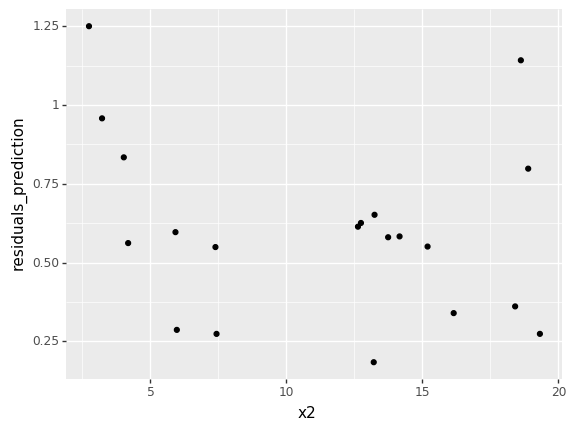

<ggplot: (-9223371957515298072)>

In [18]:
fig_res_x

In [19]:
df.tail(20).corr()

,y,x1,x2,y_predicted_x1,y_predicted_x2,residualsx1,residualsx2,y_predict,residuals_prediction
y,1.000000,0.641969,0.954573,0.641969,0.954573,0.914777,0.672411,0.994218,-0.160702
x1,0.641969,1.000000,0.404663,1.000000,0.404663,0.277530,0.948697,0.668390,-0.010363
x2,0.954573,0.404663,1.000000,0.404663,1.000000,0.982884,0.421310,0.950663,-0.250059
y_predicted_x1,0.641969,1.000000,0.404663,1.000000,0.404663,0.277530,0.948697,0.668390,-0.010363
y_predicted_x2,0.954573,0.404663,1.000000,0.404663,1.000000,0.982884,0.421310,0.950663,-0.250059
residualsx1,0.914777,0.277530,0.982884,0.277530,0.982884,1.000000,0.342704,0.893611,-0.195901
residualsx2,0.672411,0.948697,0.421310,0.948697,0.421310,0.342704,1.000000,0.664526,0.132040
y_predict,0.994218,0.668390,0.950663,0.668390,0.950663,0.893611,0.664526,1.000000,-0.206909
residuals_prediction,-0.160702,-0.010363,-0.250059,-0.010363,-0.250059,-0.195901,0.132040,-0.206909,1.000000
